In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import datetime

In [2]:
df = pd.read_json("https://s3.amazonaws.com/far-right/twitter/mb_protests.json")

In [3]:
df.columns

Index(['created', 'friends_count', 'hashtags', 'id_str', 'text',
       'user_created', 'user_description', 'user_followers', 'user_location',
       'user_name'],
      dtype='object')

In [4]:
print("Total number of tweets = {}".format(len(df)))

Total number of tweets = 116526


##### How many tweets are about the 'wall'?

In [5]:
# Lowercase the hashtags and tweet body
df['hashtags'] = df['hashtags'].str.lower()
df['text'] = df['text'].str.lower()

In [6]:
print("Total number of tweets containing hashtag 'wall' = {}".format(len(df[df['hashtags'].str.contains('wall')])))

Total number of tweets containing hashtag 'wall' = 6372


In [7]:
print("Total number of tweets whose body contains 'wall' = {}".format(len(df[df['text'].str.contains('wall')])))

Total number of tweets whose body contains 'wall' = 7241


In [8]:
wall_tweets = df[(df['hashtags'].str.contains('wall')) | (df['text'].str.contains('wall'))].copy()

In [9]:
print("Total number of tweets about the 'wall' = {}".format(len(wall_tweets)))

Total number of tweets about the 'wall' = 7241


##### What is the average twitter tenure of people who tweeted about the wall?

In [11]:
def months_between(end, start):
    return (end.year - start.year)*12 + end.month - start.month

In [12]:
wall_tweets['created'] = pd.to_datetime(wall_tweets['created'])
wall_tweets['user_created'] = pd.to_datetime(wall_tweets['user_created'])

In [13]:
wall_tweets['user_tenure'] = wall_tweets[['created', \
                            'user_created']].apply(lambda row: months_between(row[0], row[1]), axis=1)

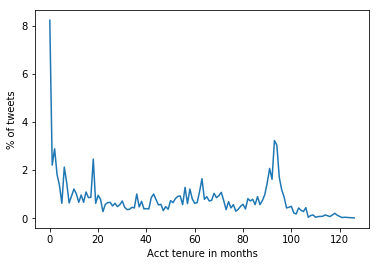

In [17]:
tenure_grouping = wall_tweets.groupby('user_tenure').size() / len(wall_tweets) * 100

fig, ax = plt.subplots()

ax.plot(tenure_grouping.index, tenure_grouping.values)

ax.set_ylabel("% of tweets")
ax.set_xlabel("Acct tenure in months")

plt.show()

##### There are a couple of users tweeting multiple times, but most tweets come from distinct twitter handles 

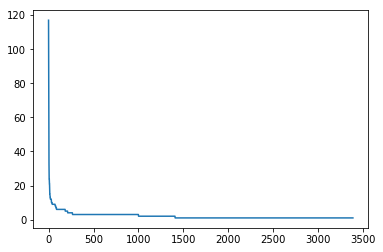

In [22]:
tweets_per_user = wall_tweets.groupby('user_name').size().sort_values(ascending=False)

fig, ax = plt.subplots()

ax.plot(tweets_per_user.values)

plt.show()

##### Who are the 'top tweeters' + descriptions?

In [35]:
wall_tweets.groupby(['user_name', 'user_description']).size().sort_values(ascending=False).head(20).to_frame()

,,0
user_name,user_description,
realtrumpNOT,parody account,117
latinagirlpwr,I love Obama but I'm still a #NasyWomen and I'm with her! #NotMyFreakingPresisdent,63
OccupyWeather,#OccupyWallStreet: see these smart & highly effective alternatives to camping in a frozen park: http://t.co/BifM2W4X http://t.co/fZFoQsWz http://t.co/MfyMRYqt,61
timothypwoodwa1,Let ALL races UNITE to Fix our Country for ALL legal Americans to live Safe & Prosper. ~ Independent Thinker ~,57
tiwhitter,"Heart belongs to Jesus, avid reader, writer, blogger, theologian, cat lady, music lover, believer in miracles, imperfect above all else.",54
timothypwoodwa1,"Let ALL races UNITE to Fix our Country for ALL legal Americans to live Safe & Prosper. ~ Independent Thinker ~ Rodents, Porn & Ghost AccountsWILL BE BLOCKED!",39
tamilartist,Artist,33
Crusaydah,WAR.,27
DNdamagi,"U dont know me well enough to judge me,but when you mess up, Im calling u out",24


##### What is the reach of these tweets in terms of followers?

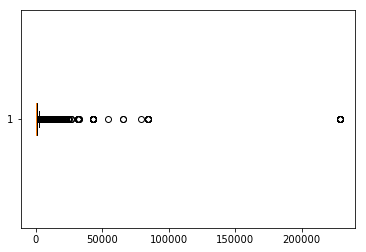

In [57]:
plt.boxplot(wall_tweets['friends_count'].values, vert=False)
plt.show()

In [58]:
wall_tweets['friends_count'].describe()

count      7241.000000
mean       1749.011324
std        9197.940081
min           0.000000
25%         150.000000
50%         430.000000
75%        1121.000000
max      228852.000000
Name: friends_count, dtype: float64

##### Location of the tweets?

In [39]:
wall_tweets.groupby('user_location').size().sort_values(ascending=False)

user_location
United States                     373
California, USA                   127
Brooklyn, NY                      121
One Nation Under God, USA          96
Los Angeles, CA                    82
USA                                81
New York, NY                       76
Chicago, IL                        74
Washington, DC                     62
Florida, USA                       49
Seattle, WA                        48
New York, USA                      46
New Jersey, USA                    45
San Francisco, CA                  40
Los Angeles                        39
San Diego, CA                      39
Philadelphia, PA                   36
New York City                      34
New York City, USA                 33
London, England                    33
Chicago                            32
Dallas, TX                         32
Columbus, OH                       31
Boston, MA                         30
NYC                                26
Oakland, CA                        2